In [1]:
pip install scikit-plot==0.3.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [4]:
data = pd.read_csv("cleaned_data.csv")
df = pd.DataFrame(data)

In [5]:
df.head()

,category,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.68,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0
1,red,7.8,0.68,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0.0
2,red,7.8,0.68,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0.0
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0
4,red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0.0


In [6]:
df["category"] = df["category"].replace(["red","white"],[0,1])

In [7]:
#sets the independent variables
X = df.iloc[:,:-1]

#sets the prediction targets
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0)


In [8]:
def quality_accuracy(y_t,y_p):
  cm = pd.DataFrame(confusion_matrix(y_t, y_p), index=['True[0]','True[1]','True[2]'],
                columns=['Predict[0]','Predict[1]','Predict[2]'])
  ac = accuracy_score(y_t,y_p)
  print(cm)
  print(f'Accuracy score is {ac}')
  print(classification_report(y_t,y_p))

In [9]:
ranforest=RandomForestClassifier()
ranforest.fit(X_train,y_train)
y_pred=ranforest.predict(X_test)
quality_accuracy(y_test,y_pred)


         Predict[0]  Predict[1]  Predict[2]
True[0]         281         142           3
True[1]         129         289          37
True[2]           9          99          86
Accuracy score is 0.6102325581395349
              precision    recall  f1-score   support

         0.0       0.67      0.66      0.67       426
         1.0       0.55      0.64      0.59       455
         2.0       0.68      0.44      0.54       194

    accuracy                           0.61      1075
   macro avg       0.63      0.58      0.60      1075
weighted avg       0.62      0.61      0.61      1075



<Axes: title={'center': 'Confusion Matrix for GBC'}, xlabel='Predicted label', ylabel='True label'>

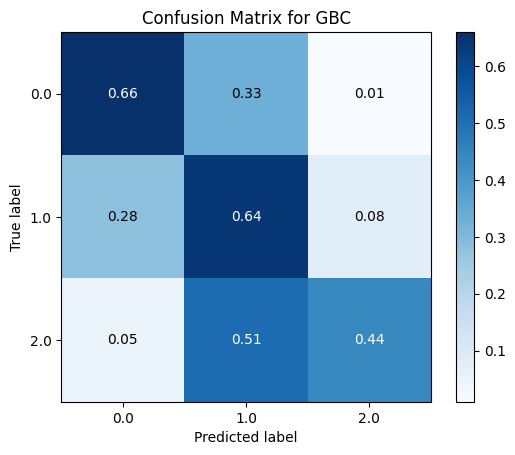

In [10]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, title = 'Confusion Matrix for GBC')

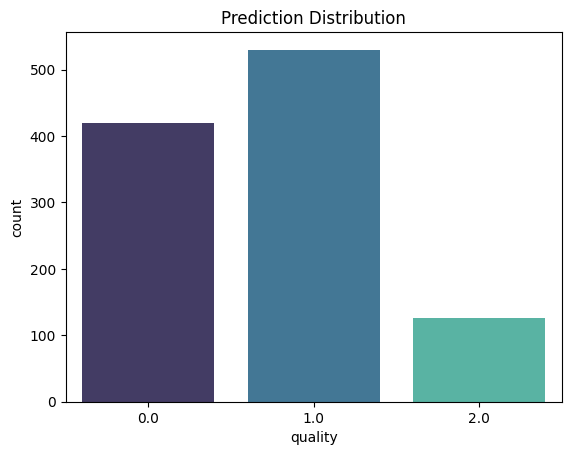

In [11]:
sns.countplot(pd.DataFrame(y_pred, columns = ['quality']),x='quality', palette = 'mako');
plt.title('Prediction Distribution');

In [12]:
#if want to apply re-balancing technique SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

<Axes: xlabel='quality'>

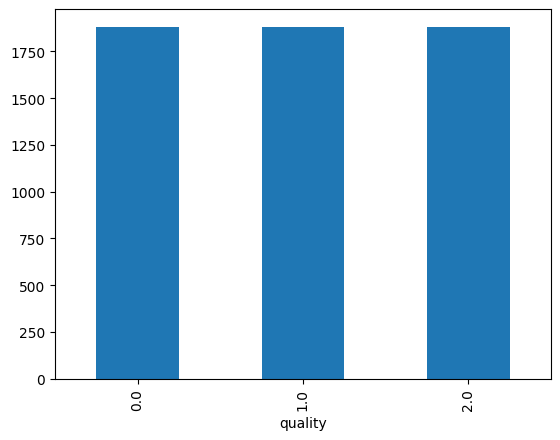

In [13]:
pd.DataFrame(y_res, columns = ['quality']).groupby('quality').size().plot(kind='bar')

In [14]:
ranforest=RandomForestClassifier()
ranforest.fit(X_res,y_res)
y_pred=ranforest.predict(X_res)
quality_accuracy(y_res,y_pred)

         Predict[0]  Predict[1]  Predict[2]
True[0]        1882           0           0
True[1]           0        1882           0
True[2]           0           2        1880
Accuracy score is 0.9996457669146298
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1882
         1.0       1.00      1.00      1.00      1882
         2.0       1.00      1.00      1.00      1882

    accuracy                           1.00      5646
   macro avg       1.00      1.00      1.00      5646
weighted avg       1.00      1.00      1.00      5646



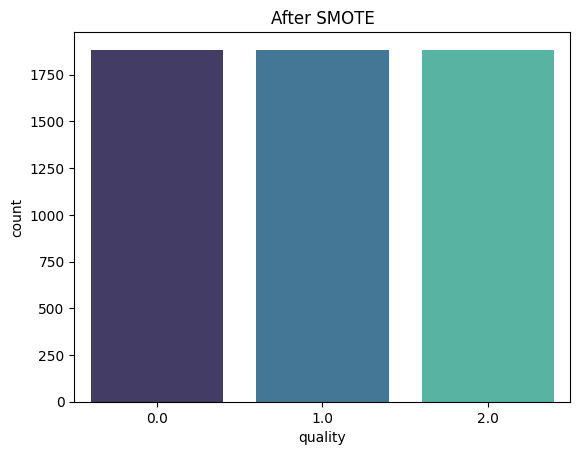

In [15]:
sns.countplot(pd.DataFrame(y_pred, columns = ['quality']),x='quality', palette = 'mako');
plt.title('After SMOTE');